In [1]:
%load_ext lab_black

In [2]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from combine import recombine

potholes = recombine("../data/potholes_1.csv", "../data/potholes_2.csv")
census_data = pd.read_csv("../data/chicago_census_data.csv")

In [3]:
pothole_counts = potholes.groupby("Community Area").size()

In [4]:
counts_by_income = pd.DataFrame(census_data.iloc[:, [0, 7]])

In [5]:
counts_by_income.columns.values[0] = "Community Area"

In [6]:
counts_by_income.columns.values[1] = "Per Capita Income"

In [7]:
counts_by_income.loc[:, "Potholes"] = pothole_counts

In [8]:
counts_by_income.sort_values(by="Per Capita Income", ascending=False, inplace=True)

In [9]:
print(counts_by_income)

    Community Area  Per Capita Income  Potholes
7              8.0              88669     11554
6              7.0              71551     12123
31            32.0              65526      7897
5              6.0              60058      6360
32            33.0              59077      8871
..             ...                ...       ...
66            67.0              11317      9249
25            26.0              10934     19481
36            37.0              10432       706
29            30.0              10402      6518
53            54.0               8201      7649

[78 rows x 3 columns]


In [10]:
counts_by_income.describe()

,Community Area,Per Capita Income,Potholes
count,77.000000,78.000000,78.000000
mean,39.000000,25597.000000,7181.346154
std,22.371857,15196.405541,4198.791440
min,1.000000,8201.000000,706.000000
25%,20.000000,15804.750000,3804.500000
50%,39.000000,21668.500000,6947.000000
75%,58.000000,28715.750000,9790.500000
max,77.000000,88669.000000,19481.000000


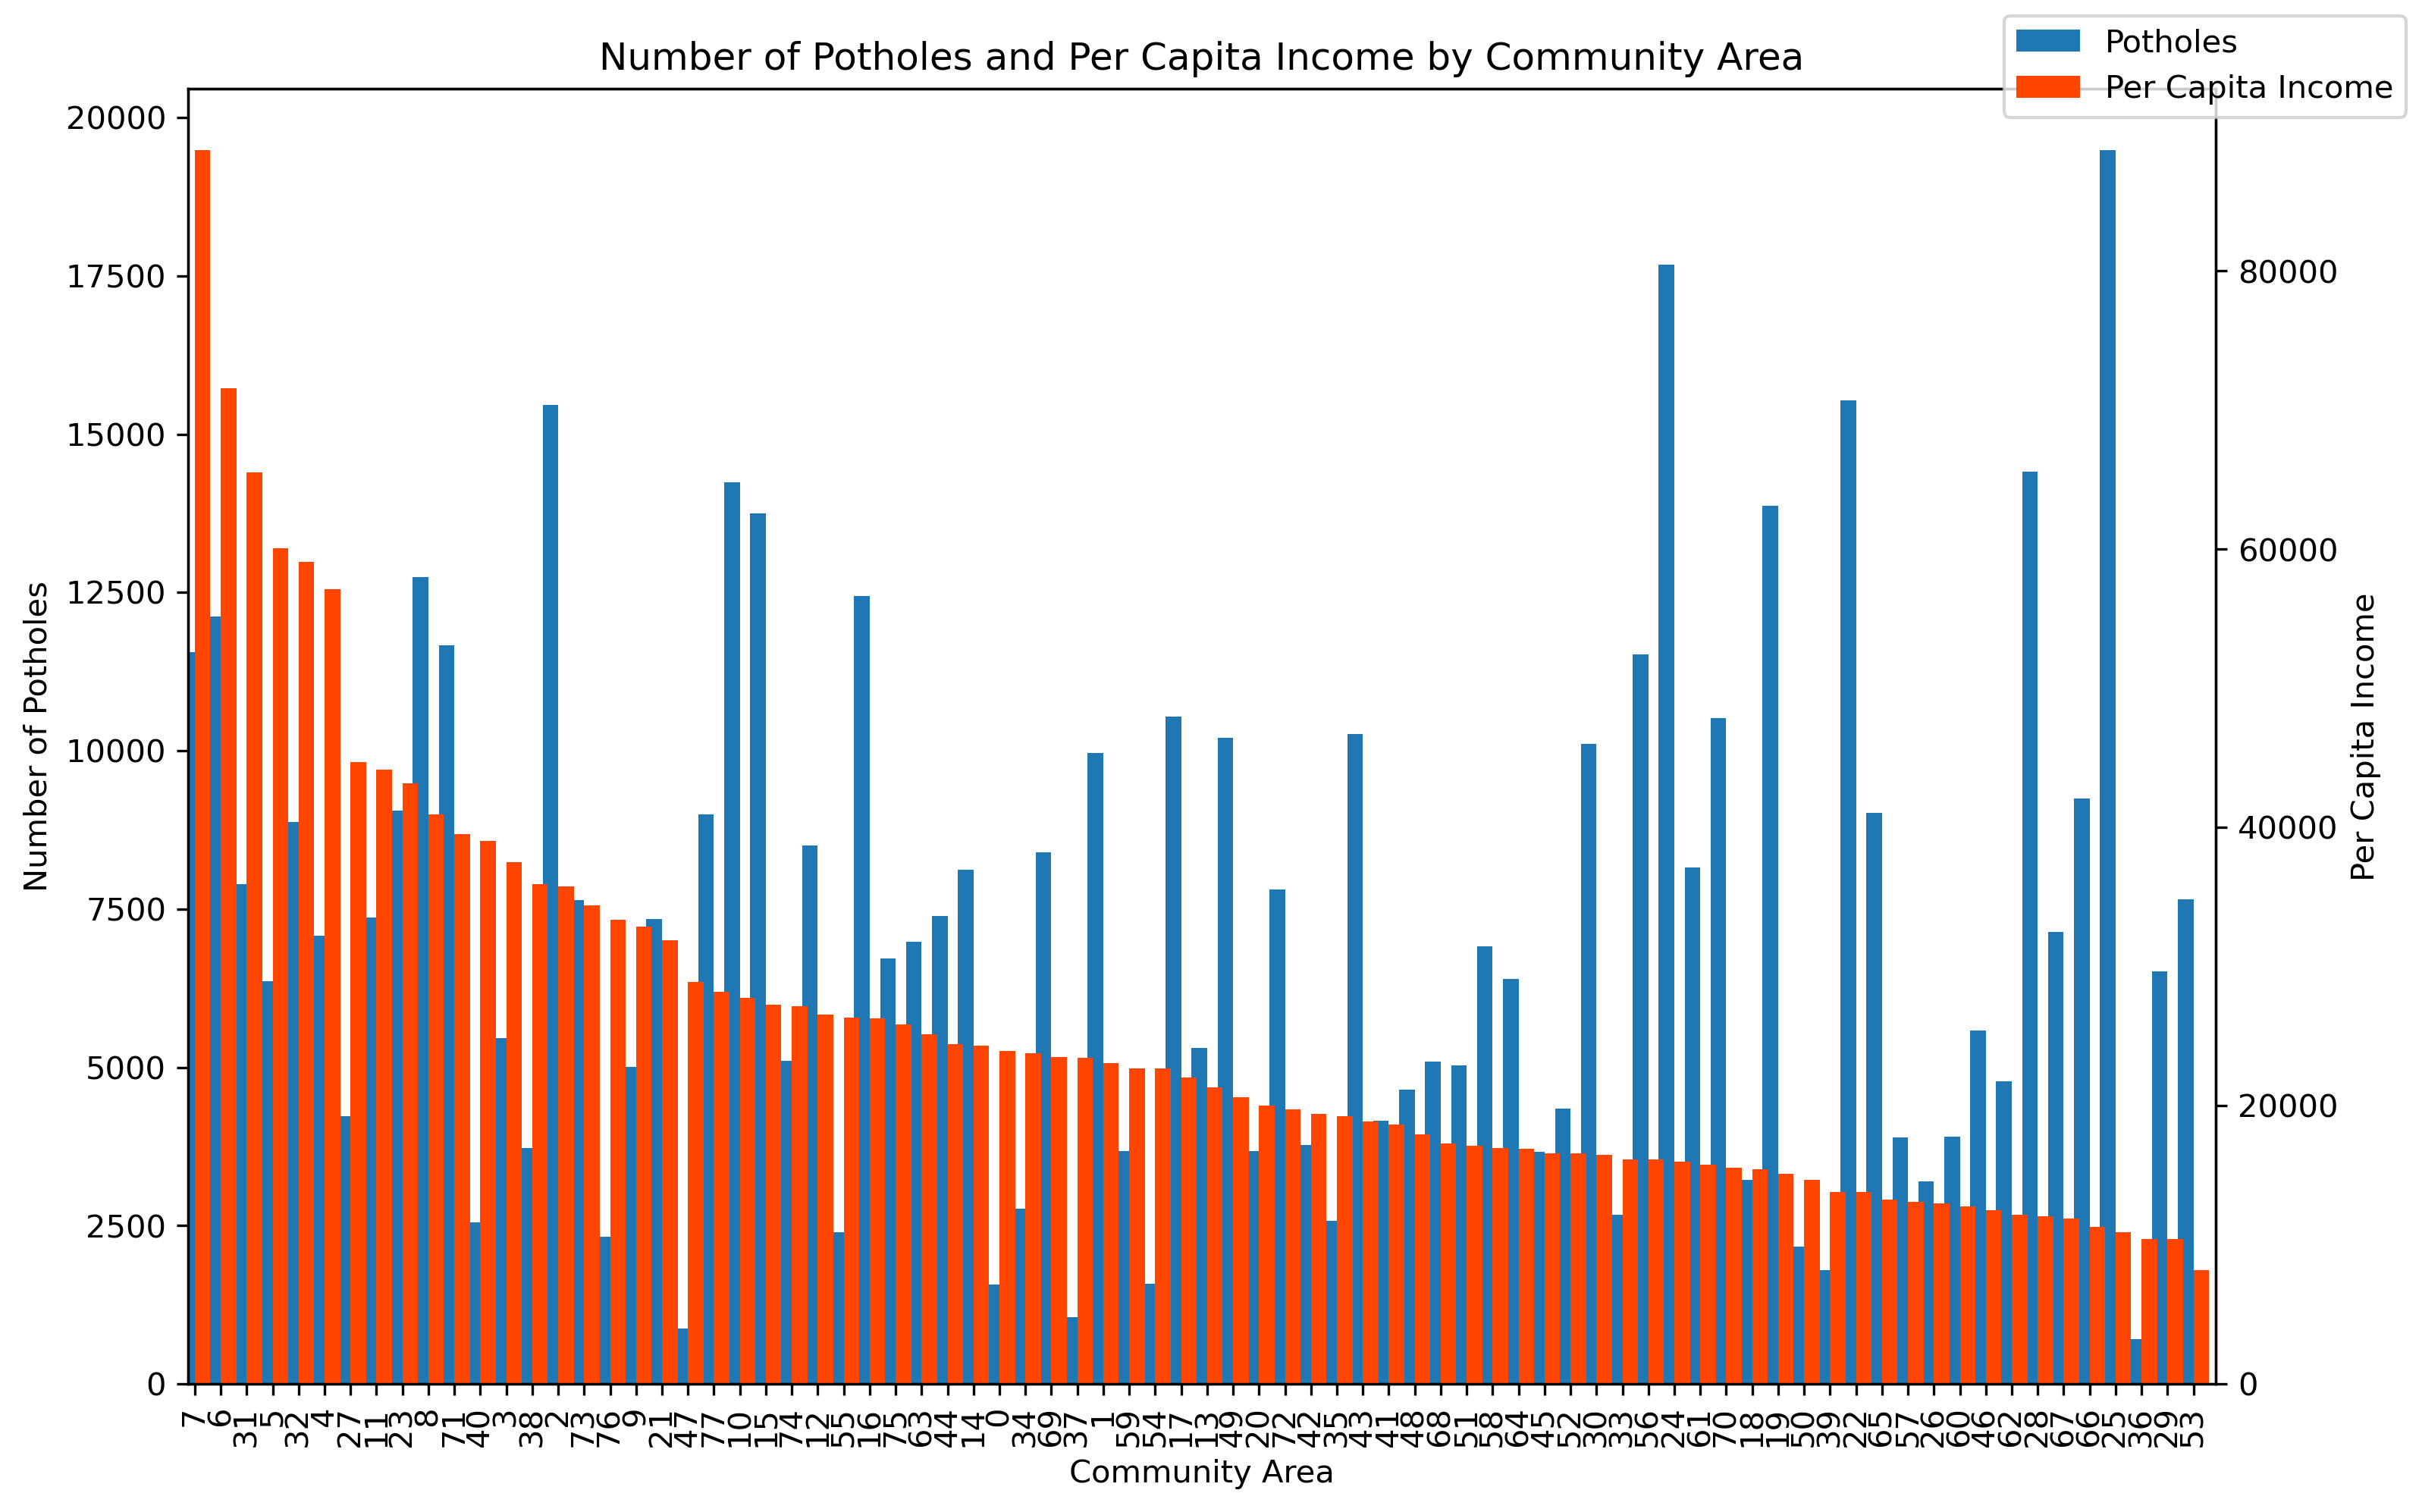

In [11]:
fig = plt.figure(figsize=(16 / 1.5, 10 / 1.5), dpi=300)

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.6

figure = counts_by_income[("Potholes")].plot(
    kind="bar", ax=ax, width=width, position=1, label="Potholes"
)
figure2 = counts_by_income[("Per Capita Income")].plot(
    kind="bar",
    color="orangered",
    ax=ax2,
    width=width,
    position=0,
    label="Per Capita Income",
)

ax.set_title("Number of Potholes and Per Capita Income by Community Area")
ax.set_ylabel("Number of Potholes")
ax2.set_ylabel("Per Capita Income")
ax.set_xlabel("Community Area")

fig.legend()

fig.tight_layout()

plt.show()

In [12]:
fig_counts_by_income = figure.get_figure()
os.makedirs("../artifacts", exist_ok=True)
fig_counts_by_income.savefig("../artifacts/counts_by_income.png")